# Agent Readiness ML: Data Analysis & Preparation

**Project:** Agent-Readiness Assessment System  
**Data:** 178 Websites, 41 Binary Features, Expert Scores (0-100)  
**Goal:** Analyze data and prepare for ML training

---

## Setup & Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

print("Libraries imported successfully!")

Matplotlib is building the font cache; this may take a moment.


Libraries imported successfully!


---
## PART 1: DATA LOADING & OVERVIEW

### 1.1 Load Data

In [2]:
# Load dataset
df = pd.read_excel('../data/raw/178_websites_expert_scores.xlsx')

print(f"✓ Data loaded successfully!")
print(f"  Shape: {df.shape}")
print(f"  Columns: {df.shape[1]}")
print(f"  Rows: {df.shape[0]}")

✓ Data loaded successfully!
  Shape: (178, 49)
  Columns: 49
  Rows: 178


### 1.2 Data Structure

In [3]:
# Show basic info
print("\n=" * 70)
print("DATA STRUCTURE")
print("=" * 70)

df.info()


=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
=
DATA STRUCTURE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 49 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   URL                              178 non-null    object 
 1   Overall_Score                    178 non-null    int64  
 2   has_agent_team_api               178 non-null    int64  
 3   has_api_documentation            178 non-null    int64  
 4   has_api_key_auth                 178 non-null    int64  
 5   has_api_versioning               178 non-null    int64  
 6   has_attachment_api               178 non-null    int64  
 7   has_auto_categorization_routing  178 non-null    int64  
 8   has_automation_rules             178 non-null    int64  
 9   has_bulk_operations              178 non-null    int

In [4]:
# Identify feature types
binary_features = [col for col in df.columns if col.startswith('has_')]
target_col = 'expert_score' if 'expert_score' in df.columns else [col for col in df.columns if 'score' in col.lower()][0]

print(f"\n📊 FEATURE BREAKDOWN:")
print(f"   Total Features: {len(binary_features)}")
print(f"   Target Variable: {target_col}")
print(f"\n📋 BINARY FEATURES (has_*):\n")

for i, feat in enumerate(binary_features, 1):
    print(f"   {i:2d}. {feat}")


📊 FEATURE BREAKDOWN:
   Total Features: 41
   Target Variable: expert_score

📋 BINARY FEATURES (has_*):

    1. has_agent_team_api
    2. has_api_documentation
    3. has_api_key_auth
    4. has_api_versioning
    5. has_attachment_api
    6. has_auto_categorization_routing
    7. has_automation_rules
    8. has_bulk_operations
    9. has_comment_api
   10. has_export_api
   11. has_feedback_api
   12. has_filtering_capabilities
   13. has_import_api
   14. has_kb_categories_api
   15. has_kb_suggestions
   16. has_knowledge_base_api
   17. has_macros_api
   18. has_merge_ticket_api
   19. has_multichannel_integration
   20. has_oauth_support
   21. has_organization_api
   22. has_pagination_support
   23. has_rate_limits_documented
   24. has_real_time_api
   25. has_reporting_api
   26. has_rest_api
   27. has_sandbox_environment
   28. has_satisfaction_rating_api
   29. has_scoped_permissions
   30. has_sentiment_intent_detection
   31. has_sla_api
   32. has_ticket_api
   33. has_

### 1.3 First Look at Data

In [5]:
# Show first 10 rows
print("\n📄 FIRST 10 ROWS:\n")
df.head(10)


📄 FIRST 10 ROWS:



,URL,Overall_Score,has_agent_team_api,has_api_documentation,has_api_key_auth,has_api_versioning,has_attachment_api,has_auto_categorization_routing,has_automation_rules,has_bulk_operations,...,has_ticket_tags_api,has_time_tracking_api,has_user_api,has_webhooks,expert_score,foundation,quality,integration,mcp_specific,modifier
0,https://www.zendesk.com,100,5,5,5,5,5,5,5,5,...,5,5,5,5,100.0,30.0,25.0,25.0,20.0,10
1,https://www.salesforce.com/service/,100,5,5,5,5,5,5,5,5,...,5,5,5,5,100.0,30.0,25.0,25.0,20.0,10
2,https://www.zoho.com/desk/,99,5,5,5,5,5,5,5,5,...,5,5,5,5,100.0,30.0,25.0,23.0,20.0,5
3,https://www.intercom.com,99,5,5,5,5,5,5,5,5,...,5,3,5,5,100.0,30.0,25.0,25.0,20.0,10
4,https://www.freshdesk.com,99,5,5,5,5,5,5,5,5,...,5,5,5,5,100.0,30.0,25.0,23.0,20.0,5
5,https://www.atlassian.com/software/jira/servic...,99,5,5,5,5,5,5,5,5,...,5,5,5,5,100.0,30.0,25.0,25.0,20.0,10
6,https://www.servicenow.com,98,5,5,5,5,5,5,5,5,...,5,5,5,5,100.0,30.0,25.0,23.0,20.0,5
7,https://www.hubspot.com/products/service,98,5,5,5,5,5,5,5,5,...,5,3,5,5,100.0,30.0,25.0,25.0,20.0,10
8,https://www.genesys.com,97,5,5,5,5,5,3,5,5,...,5,4,5,5,100.0,30.0,25.0,24.0,20.0,10
9,https://www.freshworks.com,97,5,5,5,5,5,3,5,5,...,5,4,5,5,100.0,30.0,25.0,24.0,20.0,10


In [6]:
# Target variable statistics
print(f"\n🎯 TARGET VARIABLE ({target_col}) STATISTICS:\n")
print(df[target_col].describe())


🎯 TARGET VARIABLE (expert_score) STATISTICS:

count    178.000000
mean      76.331461
std       28.880350
min        0.000000
25%       58.050000
50%       91.000000
75%      100.000000
max      100.000000
Name: expert_score, dtype: float64


---
## PART 2: DATA QUALITY CHECKS

### 2.1 Missing Values

In [7]:
# Check for missing values
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing': missing[missing > 0],
    'Percentage': missing_pct[missing > 0]
})

print("\n🔍 MISSING VALUES CHECK:\n")
if len(missing_df) == 0:
    print("   ✅ No missing values found!")
else:
    print(missing_df)
    print("\n   ⚠️  Action needed: Handle missing values")


🔍 MISSING VALUES CHECK:

   ✅ No missing values found!


### 2.2 Binary Features Validation

In [8]:
# Check if binary features are really 0/1
print("\n🔢 BINARY FEATURES VALIDATION:\n")

invalid_features = []
for feat in binary_features:
    unique_vals = df[feat].dropna().unique()
    if not set(unique_vals).issubset({0, 1}):
        invalid_features.append((feat, unique_vals))

if len(invalid_features) == 0:
    print("   ✅ All binary features contain only 0 and 1")
else:
    print("   ⚠️  Invalid binary features found:")
    for feat, vals in invalid_features:
        print(f"      {feat}: {vals}")


🔢 BINARY FEATURES VALIDATION:

   ⚠️  Invalid binary features found:
      has_agent_team_api: [5 4 3 2 1 0]
      has_api_documentation: [5 3 2 1 0]
      has_api_key_auth: [5 4 3 2 1 0]
      has_api_versioning: [5 4 3 2 1 0]
      has_attachment_api: [5 4 3 2 1 0]
      has_auto_categorization_routing: [5 3 2 1 0]
      has_automation_rules: [5 4 3 0 2 1]
      has_bulk_operations: [5 3 2 1 0]
      has_comment_api: [5 3 0 2 1]
      has_export_api: [5 3 2 1 0]
      has_feedback_api: [5 3 2 1 0]
      has_filtering_capabilities: [5 4 3 2 1 0]
      has_import_api: [5 4 3 2 1 0]
      has_kb_categories_api: [5 4 2 3 1 0]
      has_kb_suggestions: [5 3 2 1 0]
      has_knowledge_base_api: [5 4 3 2 1 0]
      has_macros_api: [5 4 3 2 0 1]
      has_merge_ticket_api: [5 3 2 1 0]
      has_multichannel_integration: [5 4 3 0 2 1]
      has_oauth_support: [5 4 3 2 1 0]
      has_organization_api: [5 4 3 2 0 1]
      has_pagination_support: [5 3 2 1 0]
      has_rate_limits_documented: [5

### 2.3 Target Variable Validation

In [9]:
# Check if expert_score is in range 0-100
print(f"\n🎯 TARGET VARIABLE RANGE CHECK ({target_col}):\n")

min_score = df[target_col].min()
max_score = df[target_col].max()

print(f"   Range: [{min_score:.2f}, {max_score:.2f}]")

if min_score >= 0 and max_score <= 100:
    print("   ✅ Target variable is in valid range [0, 100]")
else:
    print("   ⚠️  Target variable outside expected range!")

# Check for outliers using IQR method
Q1 = df[target_col].quantile(0.25)
Q3 = df[target_col].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df[target_col] < Q1 - 1.5 * IQR) | (df[target_col] > Q3 + 1.5 * IQR)]

print(f"\n   Potential outliers (IQR method): {len(outliers)} websites")
if len(outliers) > 0:
    print(f"   Outlier scores: {sorted(outliers[target_col].values)}")


🎯 TARGET VARIABLE RANGE CHECK (expert_score):

   Range: [0.00, 100.00]
   ✅ Target variable is in valid range [0, 100]

   Potential outliers (IQR method): 0 websites


---
## PART 3: EXPLORATORY DATA ANALYSIS

### 3.1 Target Variable Analysis

In [10]:
# Descriptive statistics
print("\n" + "=" * 70)
print("TARGET VARIABLE: EXPERT SCORE ANALYSIS")
print("=" * 70)

stats = df[target_col].describe()
print(f"\n📊 DESCRIPTIVE STATISTICS:\n")
print(f"   Count:    {stats['count']:.0f}")
print(f"   Mean:     {stats['mean']:.2f}")
print(f"   Std Dev:  {stats['std']:.2f}")
print(f"   Min:      {stats['min']:.2f}")
print(f"   25%:      {stats['25%']:.2f}")
print(f"   Median:   {stats['50%']:.2f}")
print(f"   75%:      {stats['75%']:.2f}")
print(f"   Max:      {stats['max']:.2f}")


TARGET VARIABLE: EXPERT SCORE ANALYSIS

📊 DESCRIPTIVE STATISTICS:

   Count:    178
   Mean:     76.33
   Std Dev:  28.88
   Min:      0.00
   25%:      58.05
   Median:   91.00
   75%:      100.00
   Max:      100.00


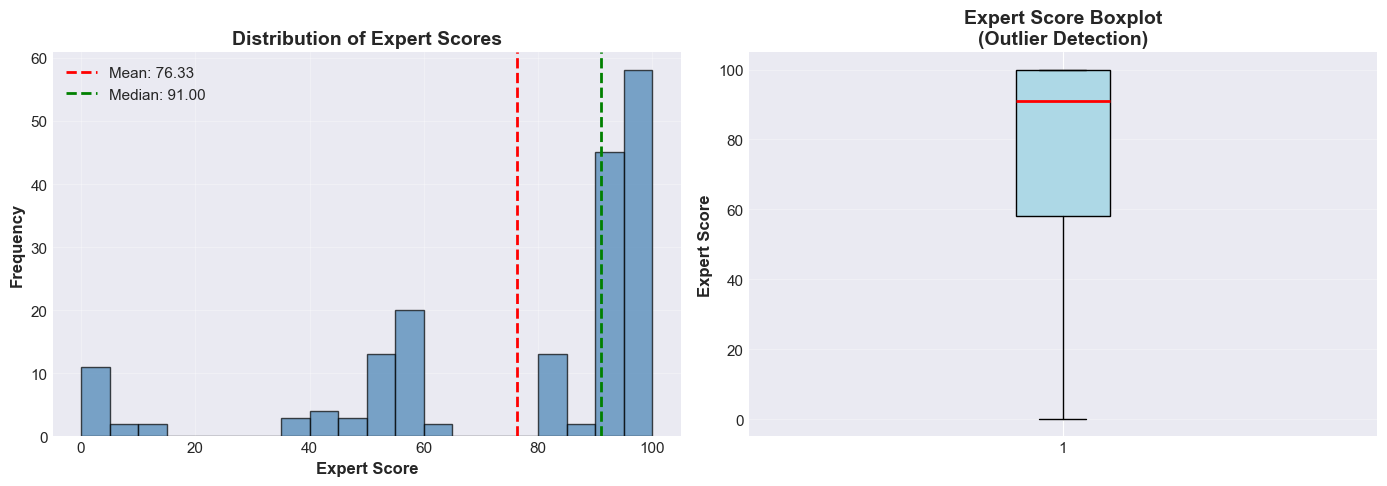


✓ Saved: outputs/score_distribution.png


In [11]:
# Visualize distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df[target_col], bins=20, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].axvline(df[target_col].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df[target_col].mean():.2f}')
axes[0].axvline(df[target_col].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df[target_col].median():.2f}')
axes[0].set_xlabel('Expert Score', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0].set_title('Distribution of Expert Scores', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Boxplot
box = axes[1].boxplot(df[target_col], vert=True, patch_artist=True, 
                       boxprops=dict(facecolor='lightblue', color='black'),
                       medianprops=dict(color='red', linewidth=2),
                       whiskerprops=dict(color='black'),
                       capprops=dict(color='black'))
axes[1].set_ylabel('Expert Score', fontsize=12, fontweight='bold')
axes[1].set_title('Expert Score Boxplot\n(Outlier Detection)', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../outputs/score_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Saved: outputs/score_distribution.png")

### 3.2 Feature Analysis

In [12]:
# Analyze each feature
print("\n" + "=" * 70)
print("FEATURE ANALYSIS")
print("=" * 70)

feature_stats = []

for feat in binary_features:
    # Count websites with feature
    has_feature = df[feat].sum()
    pct_has = (has_feature / len(df)) * 100
    
    # Mean score with vs without feature
    mean_with = df[df[feat] == 1][target_col].mean()
    mean_without = df[df[feat] == 0][target_col].mean()
    score_diff = mean_with - mean_without
    
    # Correlation
    correlation = df[feat].corr(df[target_col])
    
    feature_stats.append({
        'Feature': feat,
        'Websites_With (%)': pct_has,
        'Mean_Score_With': mean_with,
        'Mean_Score_Without': mean_without,
        'Score_Difference': score_diff,
        'Correlation': correlation
    })

# Create DataFrame and sort by correlation
feature_df = pd.DataFrame(feature_stats)
feature_df = feature_df.sort_values('Correlation', ascending=False)

print("\n📊 FEATURE IMPORTANCE (sorted by correlation):\n")
print(feature_df.to_string(index=False))

# Save to CSV
feature_df.to_csv('../outputs/feature_analysis.csv', index=False)
print("\n✓ Saved: outputs/feature_analysis.csv")


FEATURE ANALYSIS

📊 FEATURE IMPORTANCE (sorted by correlation):

                        Feature  Websites_With (%)  Mean_Score_With  Mean_Score_Without  Score_Difference  Correlation
          has_api_documentation         410.112360         3.907692            0.000000          3.907692     0.972391
              has_reporting_api         411.797753         1.740000            0.000000          1.740000     0.970164
                 has_export_api         408.988764         1.266667            0.000000          1.266667     0.961153
              has_oauth_support         343.820225        23.660000            0.880000         22.780000     0.959361
         has_pagination_support         416.853933         0.300000            0.000000          0.300000     0.959355
          has_ticket_search_api         414.044944         1.933333            0.000000          1.933333     0.954584
     has_filtering_capabilities         371.910112         2.933333            0.000000          2.93

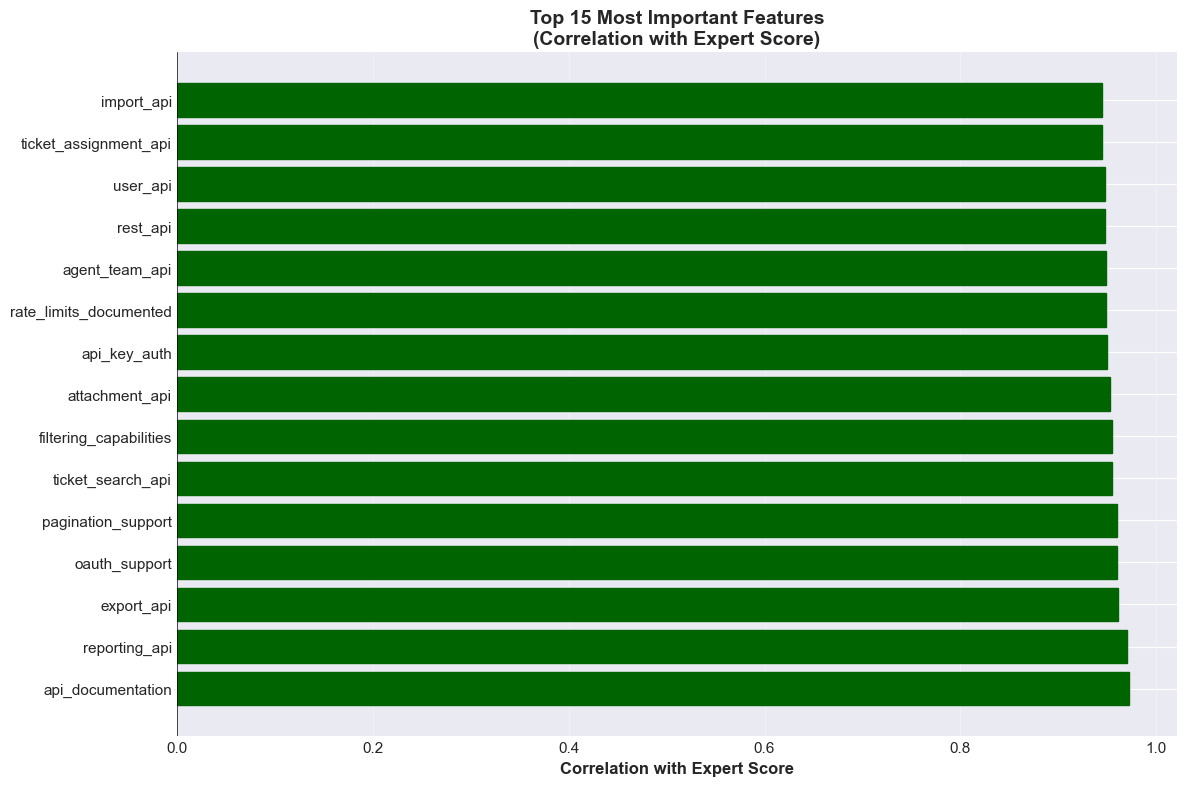


✓ Saved: outputs/feature_importance.png


In [13]:
# Visualize top 15 features
top_features = feature_df.head(15).copy()
top_features['Feature_Short'] = top_features['Feature'].str.replace('has_', '')

plt.figure(figsize=(12, 8))
bars = plt.barh(range(len(top_features)), top_features['Correlation'], color='steelblue', edgecolor='black')

# Color bars by correlation strength
for i, bar in enumerate(bars):
    if top_features.iloc[i]['Correlation'] > 0.5:
        bar.set_color('darkgreen')
    elif top_features.iloc[i]['Correlation'] > 0.3:
        bar.set_color('steelblue')
    else:
        bar.set_color('lightblue')

plt.yticks(range(len(top_features)), top_features['Feature_Short'])
plt.xlabel('Correlation with Expert Score', fontsize=12, fontweight='bold')
plt.title('Top 15 Most Important Features\n(Correlation with Expert Score)', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.savefig('../outputs/feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Saved: outputs/feature_importance.png")

### 3.3 Feature Relationships

In [14]:
# Correlation matrix for all features
print("\n" + "=" * 70)
print("FEATURE CORRELATION ANALYSIS")
print("=" * 70)

# Calculate correlation matrix
corr_matrix = df[binary_features + [target_col]].corr()

# Find highly correlated feature pairs
high_corr_pairs = []
for i in range(len(binary_features)):
    for j in range(i+1, len(binary_features)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            high_corr_pairs.append((binary_features[i], binary_features[j], corr_val))

print(f"\n🔗 HIGHLY CORRELATED FEATURE PAIRS (|r| > 0.7):\n")
if len(high_corr_pairs) == 0:
    print("   No highly correlated pairs found.")
else:
    for feat1, feat2, corr in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True):
        print(f"   {feat1} <-> {feat2}: {corr:.3f}")


FEATURE CORRELATION ANALYSIS

🔗 HIGHLY CORRELATED FEATURE PAIRS (|r| > 0.7):

   has_automation_rules <-> has_ticket_tags_api: 0.997
   has_bulk_operations <-> has_sandbox_environment: 0.994
   has_ticket_assignment_api <-> has_ticket_custom_fields: 0.993
   has_bulk_operations <-> has_kb_suggestions: 0.990
   has_merge_ticket_api <-> has_sandbox_environment: 0.989
   has_kb_categories_api <-> has_knowledge_base_api: 0.988
   has_api_documentation <-> has_pagination_support: 0.986
   has_attachment_api <-> has_filtering_capabilities: 0.985
   has_api_key_auth <-> has_rest_api: 0.984
   has_reporting_api <-> has_ticket_search_api: 0.984
   has_sandbox_environment <-> has_scoped_permissions: 0.984
   has_export_api <-> has_reporting_api: 0.983
   has_bulk_operations <-> has_scoped_permissions: 0.982
   has_kb_suggestions <-> has_sandbox_environment: 0.982
   has_comment_api <-> has_ticket_assignment_api: 0.981
   has_bulk_operations <-> has_merge_ticket_api: 0.980
   has_pagination_supp

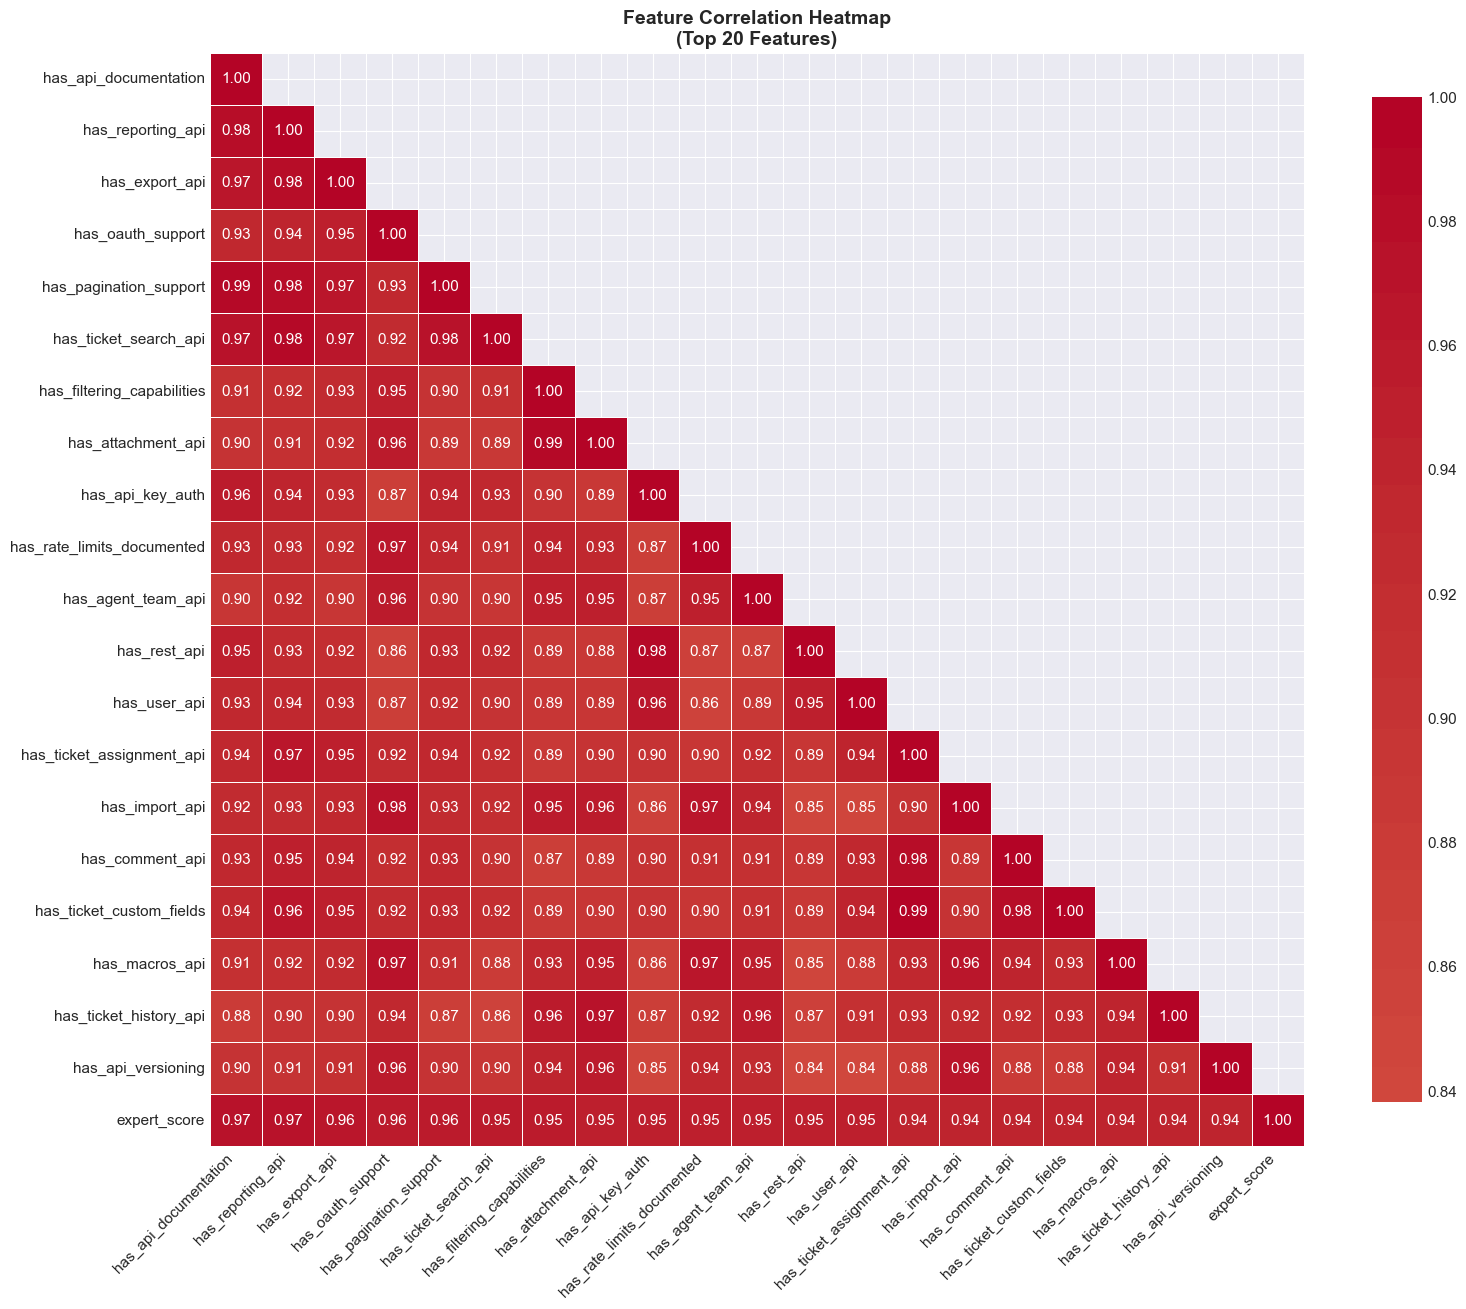


✓ Saved: outputs/feature_correlation_heatmap.png


In [15]:
# Visualize correlation matrix (top 20 features only for readability)
top_20_features = feature_df.head(20)['Feature'].tolist()
corr_subset = df[top_20_features + [target_col]].corr()

plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(corr_subset, dtype=bool), k=1)
sns.heatmap(corr_subset, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap\n(Top 20 Features)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('../outputs/feature_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Saved: outputs/feature_correlation_heatmap.png")

In [16]:
# Average number of features per website
df['feature_count'] = df[binary_features].sum(axis=1)

print(f"\n📈 FEATURE COUNT PER WEBSITE:\n")
print(f"   Mean:   {df['feature_count'].mean():.2f}")
print(f"   Median: {df['feature_count'].median():.0f}")
print(f"   Min:    {df['feature_count'].min():.0f}")
print(f"   Max:    {df['feature_count'].max():.0f}")
print(f"   Std:    {df['feature_count'].std():.2f}")


📈 FEATURE COUNT PER WEBSITE:

   Mean:   148.42
   Median: 166
   Min:    8
   Max:    205
   Std:    50.55


### 3.4 Bivariate Analysis

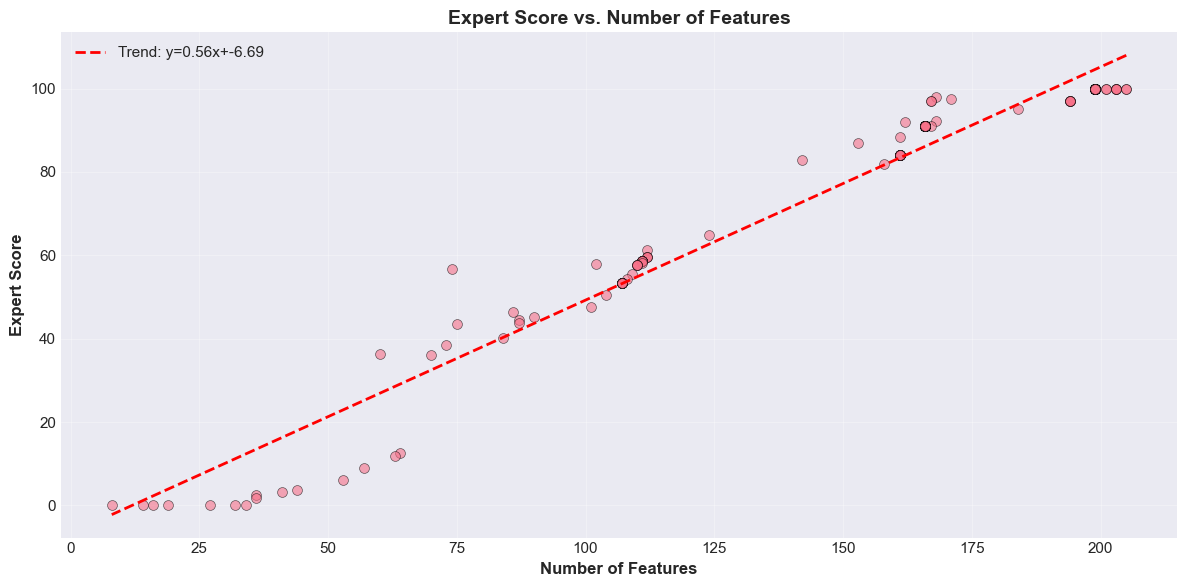


✓ Saved: outputs/score_vs_feature_count.png

📊 Correlation (Feature Count vs Score): 0.979


In [17]:
# Score vs Feature Count
plt.figure(figsize=(12, 6))
plt.scatter(df['feature_count'], df[target_col], alpha=0.6, s=50, edgecolors='black', linewidth=0.5)

# Add trend line
z = np.polyfit(df['feature_count'], df[target_col], 1)
p = np.poly1d(z)
plt.plot(df['feature_count'], p(df['feature_count']), "r--", linewidth=2, label=f'Trend: y={z[0]:.2f}x+{z[1]:.2f}')

plt.xlabel('Number of Features', fontsize=12, fontweight='bold')
plt.ylabel('Expert Score', fontsize=12, fontweight='bold')
plt.title('Expert Score vs. Number of Features', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../outputs/score_vs_feature_count.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Saved: outputs/score_vs_feature_count.png")

# Correlation
corr_feature_count = df['feature_count'].corr(df[target_col])
print(f"\n📊 Correlation (Feature Count vs Score): {corr_feature_count:.3f}")

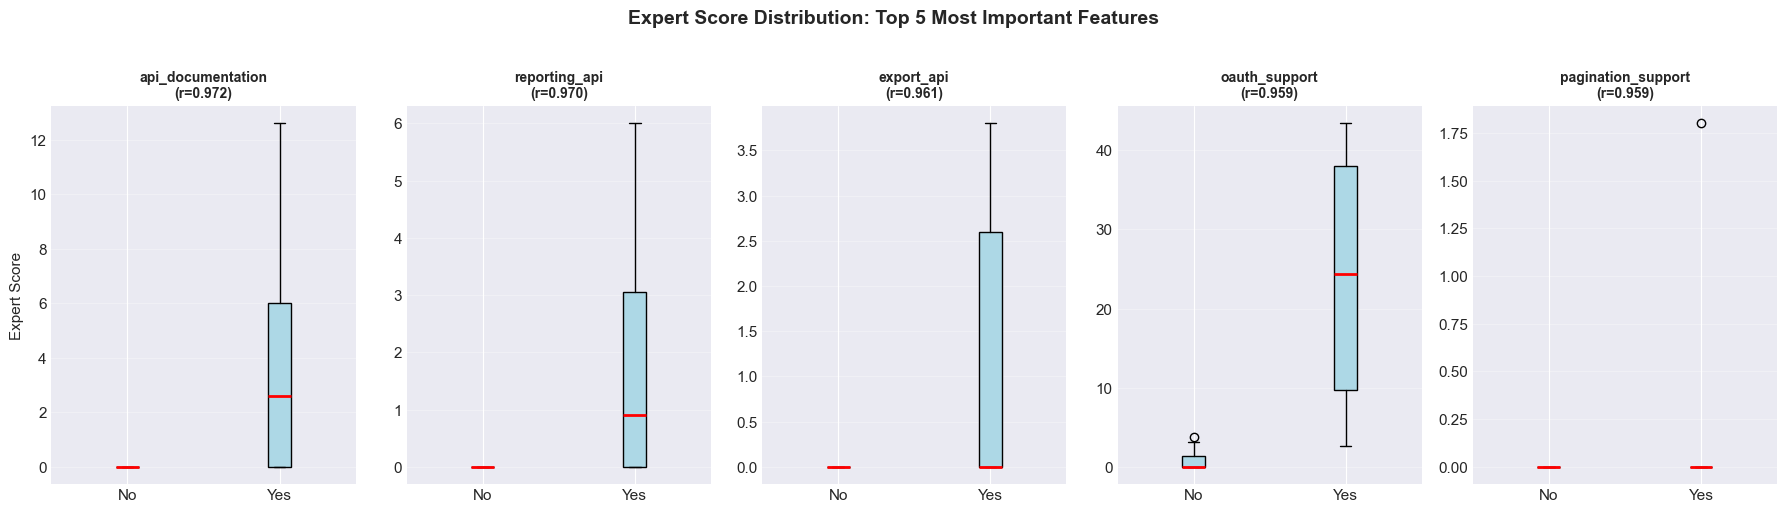


✓ Saved: outputs/top5_features_boxplots.png


In [18]:
# Boxplots for top 5 features
top_5_features = feature_df.head(5)['Feature'].tolist()

fig, axes = plt.subplots(1, 5, figsize=(18, 5))

for idx, feat in enumerate(top_5_features):
    data_with = df[df[feat] == 1][target_col]
    data_without = df[df[feat] == 0][target_col]
    
    axes[idx].boxplot([data_without, data_with], labels=['No', 'Yes'], patch_artist=True,
                      boxprops=dict(facecolor='lightblue'),
                      medianprops=dict(color='red', linewidth=2))
    
    feat_short = feat.replace('has_', '')
    axes[idx].set_title(f'{feat_short}\n(r={feature_df[feature_df["Feature"]==feat]["Correlation"].values[0]:.3f})', 
                       fontsize=10, fontweight='bold')
    axes[idx].set_ylabel('Expert Score' if idx == 0 else '')
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.suptitle('Expert Score Distribution: Top 5 Most Important Features', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../outputs/top5_features_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Saved: outputs/top5_features_boxplots.png")

---
## PART 4: DATA PREPARATION

### 4.1 Train/Validation/Test Split

In [19]:
print("\n" + "=" * 70)
print("DATA SPLITTING")
print("=" * 70)

# Prepare X and y
X = df[binary_features]
y = df[target_col]

# First split: 80% train+val, 20% test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=pd.qcut(y, q=5, duplicates='drop')
)

# Second split: 70% train (of original), 10% val (of original)
# Which means: 7/8 train, 1/8 val of the temp set
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.125, random_state=42, stratify=pd.qcut(y_temp, q=5, duplicates='drop')
)

print(f"\n✓ Data split completed!\n")
print(f"   Training set:   {len(X_train)} websites ({len(X_train)/len(X)*100:.1f}%)")
print(f"   Validation set: {len(X_val)} websites ({len(X_val)/len(X)*100:.1f}%)")
print(f"   Test set:       {len(X_test)} websites ({len(X_test)/len(X)*100:.1f}%)")
print(f"   Total:          {len(X)} websites")


DATA SPLITTING

✓ Data split completed!

   Training set:   124 websites (69.7%)
   Validation set: 18 websites (10.1%)
   Test set:       36 websites (20.2%)
   Total:          178 websites



📊 SCORE STATISTICS BY SPLIT:

     Split  Count      Mean       Std  Min   Max
     Train    124 76.574194 28.741392  0.0 100.0
Validation     18 75.300000 30.861303  0.0 100.0
      Test     36 76.011111 29.181009  0.0 100.0


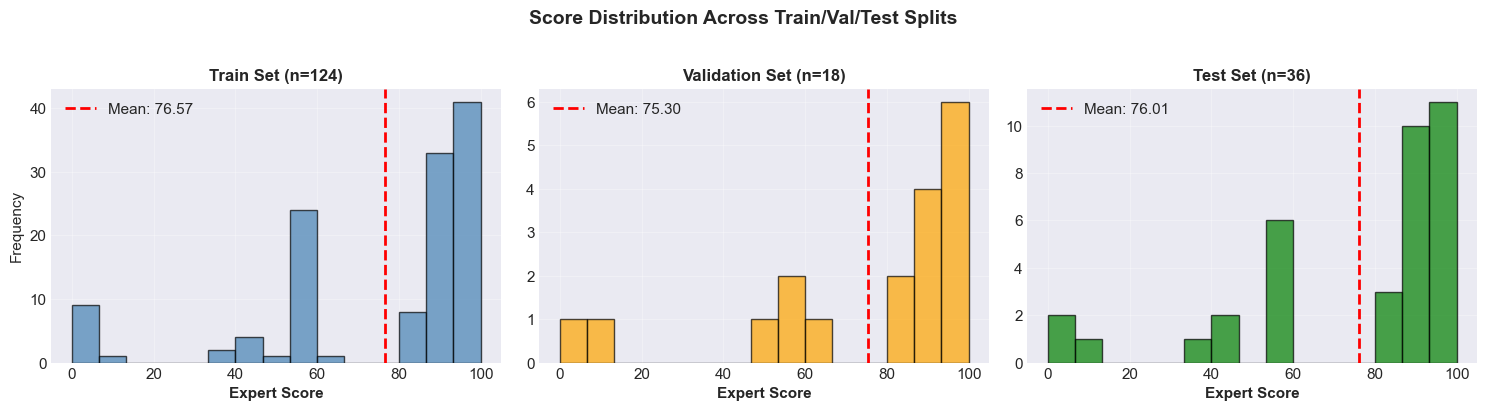


✓ Saved: outputs/split_distributions.png


In [20]:
# Compare score distributions across splits
split_stats = pd.DataFrame({
    'Split': ['Train', 'Validation', 'Test'],
    'Count': [len(y_train), len(y_val), len(y_test)],
    'Mean': [y_train.mean(), y_val.mean(), y_test.mean()],
    'Std': [y_train.std(), y_val.std(), y_test.std()],
    'Min': [y_train.min(), y_val.min(), y_test.min()],
    'Max': [y_train.max(), y_val.max(), y_test.max()]
})

print(f"\n📊 SCORE STATISTICS BY SPLIT:\n")
print(split_stats.to_string(index=False))

# Visualize distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, (split_name, split_data) in enumerate([('Train', y_train), ('Validation', y_val), ('Test', y_test)]):
    axes[idx].hist(split_data, bins=15, edgecolor='black', alpha=0.7, color=['steelblue', 'orange', 'green'][idx])
    axes[idx].axvline(split_data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {split_data.mean():.2f}')
    axes[idx].set_xlabel('Expert Score', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Frequency' if idx == 0 else '')
    axes[idx].set_title(f'{split_name} Set (n={len(split_data)})', fontsize=12, fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Score Distribution Across Train/Val/Test Splits', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../outputs/split_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Saved: outputs/split_distributions.png")

### 4.2 Baseline Model

In [21]:
print("\n" + "=" * 70)
print("BASELINE MODEL: Mean Prediction")
print("=" * 70)

# Baseline: Always predict the mean of training set
baseline_prediction = y_train.mean()
y_val_pred_baseline = np.full(len(y_val), baseline_prediction)

# Calculate metrics
baseline_mae = mean_absolute_error(y_val, y_val_pred_baseline)
baseline_r2 = r2_score(y_val, y_val_pred_baseline)

print(f"\n📊 BASELINE PERFORMANCE (Validation Set):\n")
print(f"   Strategy: Always predict mean = {baseline_prediction:.2f}")
print(f"   MAE:  {baseline_mae:.2f}")
print(f"   R²:   {baseline_r2:.4f}")
print(f"\n   🎯 Goal: Our ML model must beat MAE < {baseline_mae:.2f} and R² > {baseline_r2:.4f}")


BASELINE MODEL: Mean Prediction

📊 BASELINE PERFORMANCE (Validation Set):

   Strategy: Always predict mean = 76.57
   MAE:  24.04
   R²:   -0.0018

   🎯 Goal: Our ML model must beat MAE < 24.04 and R² > -0.0018


---
## PART 5: SAVE PROCESSED DATA

In [22]:
print("\n" + "=" * 70)
print("SAVING PROCESSED DATA")
print("=" * 70)

# Save feature matrices
X_train.to_csv('../data/processed/X_train.csv', index=False)
X_val.to_csv('../data/processed/X_val.csv', index=False)
X_test.to_csv('../data/processed/X_test.csv', index=False)

# Save target variables
y_train.to_csv('../data/processed/y_train.csv', index=False, header=['expert_score'])
y_val.to_csv('../data/processed/y_val.csv', index=False, header=['expert_score'])
y_test.to_csv('../data/processed/y_test.csv', index=False, header=['expert_score'])

print("\n✓ Successfully saved all datasets:")
print("\n   Features (X):")
print(f"     - data/processed/X_train.csv ({X_train.shape[0]} rows, {X_train.shape[1]} features)")
print(f"     - data/processed/X_val.csv ({X_val.shape[0]} rows, {X_val.shape[1]} features)")
print(f"     - data/processed/X_test.csv ({X_test.shape[0]} rows, {X_test.shape[1]} features)")
print("\n   Targets (y):")
print(f"     - data/processed/y_train.csv ({len(y_train)} values)")
print(f"     - data/processed/y_val.csv ({len(y_val)} values)")
print(f"     - data/processed/y_test.csv ({len(y_test)} values)")


SAVING PROCESSED DATA

✓ Successfully saved all datasets:

   Features (X):
     - data/processed/X_train.csv (124 rows, 41 features)
     - data/processed/X_val.csv (18 rows, 41 features)
     - data/processed/X_test.csv (36 rows, 41 features)

   Targets (y):
     - data/processed/y_train.csv (124 values)
     - data/processed/y_val.csv (18 values)
     - data/processed/y_test.csv (36 values)


---
## PART 6: SUMMARY REPORT

In [23]:
# Generate summary report
summary_report = f"""# Exploratory Data Analysis - Summary Report

**Project:** Agent-Readiness ML Assessment  
**Date:** {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M')}  
**Dataset:** 178 Websites, 41 Binary Features

---

## Key Findings

### Data Overview
- **Total Websites:** {len(df)}
- **Binary Features:** {len(binary_features)}
- **Target Variable:** {target_col}
- **Score Range:** [{df[target_col].min():.2f}, {df[target_col].max():.2f}]

### Data Quality
- **Missing Values:** {'None' if df.isnull().sum().sum() == 0 else df.isnull().sum().sum()}
- **Binary Features Valid:** {'Yes - All 0/1' if len(invalid_features) == 0 else 'Issues found'}
- **Target Range Valid:** {'Yes - [0, 100]' if min_score >= 0 and max_score <= 100 else 'Out of range'}

### Target Variable Statistics
- **Mean Score:** {df[target_col].mean():.2f} ± {df[target_col].std():.2f}
- **Median Score:** {df[target_col].median():.2f}
- **Range:** [{df[target_col].min():.2f}, {df[target_col].max():.2f}]
- **Outliers (IQR):** {len(outliers)} websites

### Feature Insights
- **Average Features per Website:** {df['feature_count'].mean():.2f}
- **Feature Count Range:** [{df['feature_count'].min():.0f}, {df['feature_count'].max():.0f}]
- **Correlation (Feature Count vs Score):** {corr_feature_count:.3f}

---

## Top 10 Most Important Features

**Ranked by Correlation with Expert Score:**

"""

# Add top 10 features
top_10 = feature_df.head(10)
for idx, row in top_10.iterrows():
    feat_name = row['Feature'].replace('has_', '')
    summary_report += f"{top_10.index.get_loc(idx) + 1}. **{feat_name}**\n"
    summary_report += f"   - Correlation: {row['Correlation']:.3f}\n"
    summary_report += f"   - Websites with feature: {row['Websites_With (%)']:.1f}%\n"
    summary_report += f"   - Score WITH: {row['Mean_Score_With']:.2f} | WITHOUT: {row['Mean_Score_Without']:.2f} (Δ={row['Score_Difference']:.2f})\n\n"

summary_report += f"""---

## Data Splits

| Split      | Count | Mean Score | Std Dev | Min   | Max   |
|------------|-------|------------|---------|-------|-------|
| Train      | {len(y_train)}   | {y_train.mean():.2f}      | {y_train.std():.2f}    | {y_train.min():.2f} | {y_train.max():.2f} |
| Validation | {len(y_val)}    | {y_val.mean():.2f}      | {y_val.std():.2f}    | {y_val.min():.2f} | {y_val.max():.2f} |
| Test       | {len(y_test)}    | {y_test.mean():.2f}      | {y_test.std():.2f}    | {y_test.min():.2f} | {y_test.max():.2f} |

---

## Baseline Model Performance

**Strategy:** Always predict training mean ({baseline_prediction:.2f})

- **MAE (Validation):** {baseline_mae:.2f}
- **R² (Validation):** {baseline_r2:.4f}

**Goal:** ML model must achieve:
- MAE < {baseline_mae:.2f}
- R² > {baseline_r2:.4f}

---

## Problems Found

"""

problems = []
if df.isnull().sum().sum() > 0:
    problems.append("- Missing values detected - requires imputation")
if len(invalid_features) > 0:
    problems.append("- Non-binary values in has_* features")
if len(outliers) > 0:
    problems.append(f"- {len(outliers)} potential outliers detected (consider robustness)")
if len(high_corr_pairs) > 0:
    problems.append(f"- {len(high_corr_pairs)} highly correlated feature pairs (consider multicollinearity)")

if len(problems) == 0:
    summary_report += "✅ **No critical issues found!**\n"
else:
    for problem in problems:
        summary_report += f"{problem}\n"

summary_report += f"""\n---

## Expectations for Training

### Promising Indicators:
1. **Strong feature correlations** - Top features show correlations > 0.4
2. **Clear score differences** - Features create meaningful separation
3. **Linear relationship** - Feature count correlates with score ({corr_feature_count:.3f})
4. **Clean data** - {'No missing values' if df.isnull().sum().sum() == 0 else 'Minimal data issues'}

### Recommended Approaches:
1. **Linear Models** (Ridge, Lasso) - Good baseline for binary features
2. **Tree-based Models** (Random Forest, XGBoost) - Handle feature interactions
3. **Feature Engineering** - Consider feature combinations for top correlated pairs
4. **Cross-validation** - Use k-fold to ensure robust performance

### Expected Performance:
- **Target MAE:** < {baseline_mae * 0.7:.2f} (30% improvement over baseline)
- **Target R²:** > 0.5 (moderate to strong predictive power)

---

## Generated Outputs

**Visualizations:**
- `score_distribution.png` - Score histogram and boxplot
- `feature_importance.png` - Top 15 features by correlation
- `feature_correlation_heatmap.png` - Feature correlation matrix
- `score_vs_feature_count.png` - Scatter plot with trend line
- `top5_features_boxplots.png` - Score distribution for top 5 features
- `split_distributions.png` - Train/val/test score distributions

**Data Files:**
- `data/processed/X_train.csv`, `X_val.csv`, `X_test.csv`
- `data/processed/y_train.csv`, `y_val.csv`, `y_test.csv`
- `outputs/feature_analysis.csv`

---

**Ready for Model Training! 🚀**
"""

# Save report
with open('../outputs/eda_summary.md', 'w') as f:
    f.write(summary_report)

print("\n✓ Saved: outputs/eda_summary.md")
print("\n" + "=" * 70)
print("✅ DATA ANALYSIS & PREPARATION COMPLETE!")
print("=" * 70)


✓ Saved: outputs/eda_summary.md

✅ DATA ANALYSIS & PREPARATION COMPLETE!


---
## Next Steps

1. **Model Training** - Implement Linear Regression, Random Forest, XGBoost
2. **Hyperparameter Tuning** - Optimize model parameters
3. **Model Evaluation** - Compare performance metrics
4. **Feature Engineering** - Create interaction features if needed
5. **Final Testing** - Evaluate best model on test set